# Capstone EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
conn = sqlite3.connect(':memory:')

# Customer Data

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/customer.csv" ./

In [ ]:
customer = pd.read_csv("customer.csv")

customer.head()

,SALES_OFFICE,CUSTOMER_NUMBER,SALES_OFFICE_DESCRIPTION,DISTRIBUTION_MODE_DESCRIPTION,SHIPPING_CONDITIONS_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION
0,G111,500964906,"Draper, UT",Sideload,48 Hours,Restaurant,Dining
1,G111,501543906,"Draper, UT",Sideload,48 Hours,Restaurant,Mexican Fast Food
2,G293,501394111,"Tacoma, WA",OFS,24 Hours,Attraction,Recreation Center
3,G238,501528559,"Colorado Springs, CO",OFS,48 Hours,Attraction,Recreation Center
4,G132,500504789,"Alamosa, CO",OFS,48 Hours,Restaurant,Fast Food


In [ ]:
# customer to sql
customer.to_sql('customer', conn, if_exists='replace', index=False)



6334

In [ ]:
# check for nulls
customer.isnull().sum()

,0
SALES_OFFICE,0
CUSTOMER_NUMBER,0
SALES_OFFICE_DESCRIPTION,0
DISTRIBUTION_MODE_DESCRIPTION,4
SHIPPING_CONDITIONS_DESCRIPTION,0
COLD_DRINK_CHANNEL_DESCRIPTION,0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,0


In [ ]:
customer['DISTRIBUTION_MODE_DESCRIPTION'].value_counts()

,count
DISTRIBUTION_MODE_DESCRIPTION,
OFS,2776
Sideload,2380
Rapid Delivery,1079
Bulk Distribution,79
Full Service,6
Night Side Load,4
Night OFS,2
Night Rapid Delivery,2
EZ Pallet,1


In [ ]:
# replace nulls in customer with OFS and save to customer_clean
customer_clean = customer.copy()
customer_clean['DISTRIBUTION_MODE_DESCRIPTION'] = customer_clean['DISTRIBUTION_MODE_DESCRIPTION'].fillna('OFS')

In [ ]:
# need to change customer_number to customer_id
customer_clean = customer_clean.rename(columns={'CUSTOMER_NUMBER': 'CUSTOMER_ID'})
customer_clean.head()

,SALES_OFFICE,CUSTOMER_ID,SALES_OFFICE_DESCRIPTION,DISTRIBUTION_MODE_DESCRIPTION,SHIPPING_CONDITIONS_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION
0,G111,500964906,"Draper, UT",Sideload,48 Hours,Restaurant,Dining
1,G111,501543906,"Draper, UT",Sideload,48 Hours,Restaurant,Mexican Fast Food
2,G293,501394111,"Tacoma, WA",OFS,24 Hours,Attraction,Recreation Center
3,G238,501528559,"Colorado Springs, CO",OFS,48 Hours,Attraction,Recreation Center
4,G132,500504789,"Alamosa, CO",OFS,48 Hours,Restaurant,Fast Food


In [ ]:
customer_clean.isnull().sum()

,0
SALES_OFFICE,0
CUSTOMER_ID,0
SALES_OFFICE_DESCRIPTION,0
DISTRIBUTION_MODE_DESCRIPTION,0
SHIPPING_CONDITIONS_DESCRIPTION,0
COLD_DRINK_CHANNEL_DESCRIPTION,0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,0


In [ ]:
# lets create a summary table with the number of customers by trade channel and show the top 10 by count
customer_clean.groupby('CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION')['CUSTOMER_ID'].count()\
.sort_values(ascending=False)\
.head(10)

,CUSTOMER_ID
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,
Dining,829
Restaurant,766
Local Convenience,409
Recreation Center,371
Motel,351
General Store,316
Bar,312
Fast Food,279
Mexican Fast Food,276


It makes sense that the majority of customers are in the food industry with some sort of service element. Dining and Restaurant are the trades with the most customers in the data.

In [ ]:
# checking sales office description
customer_clean['SALES_OFFICE_DESCRIPTION'].value_counts()

,count
SALES_OFFICE_DESCRIPTION,
"Draper, UT",974
"Tempe, AZ",403
"Wilsonville, OR",379
"Denver, CO",352
"Tacoma, WA",304
"Bellevue, WA",285
"Boise, ID",270
"Reno, NV",240
"Glendale, AZ",237


<Axes: xlabel='DISTRIBUTION_MODE_DESCRIPTION'>

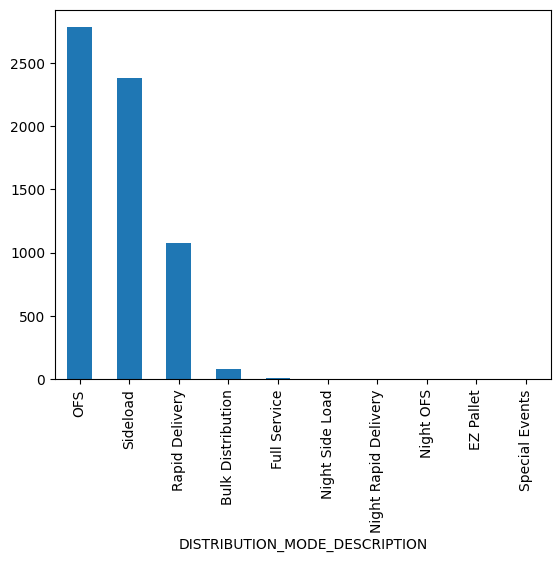

In [ ]:
# now let's make a graph that shows count of customers by distribution mode
customer_clean.groupby('DISTRIBUTION_MODE_DESCRIPTION')['CUSTOMER_ID'].count()\
.sort_values(ascending=False)\
.plot(kind='bar')

There are three distriution modes that are by far the most common with OFS being the highest in terms of customer count.

# Cutoff Times

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/cutoff_times.csv" ./

In [ ]:
cutoff_times = pd.read_csv("cutoff_times.csv")

cutoff_times.head()

,SALES_OFFICE,PLANT_ID,CUTOFFTIME__C,SHIPPING_CONDITION_TIME,DISTRIBUTION_MODE
0,"Draper, UT",G111,6:00:00 PM,72hrs,Tell Sell
1,"Draper, UT",G111,6:00:00 PM,48hrs,Tell Sell
2,"Draper, UT",G111,1:30:00 PM,24hrs,Tell Sell
3,"Draper, UT",G111,3:30:00 PM,24hrs,OFS
4,"Draper, UT",G111,3:30:00 PM,24hrs,Bulk Distribution


In [ ]:
# check for nulls
cutoff_times.isnull().sum()

,0
SALES_OFFICE,0
PLANT_ID,0
CUTOFFTIME__C,0
SHIPPING_CONDITION_TIME,0
DISTRIBUTION_MODE,0


In [ ]:
cutoff_times['DISTRIBUTION_MODE'].value_counts()

,count
DISTRIBUTION_MODE,
OFS,59
Sideload,56
Bulk Distribution,38
Full Service,30
Rapid Delivery,18
Night Rapid Delivery,5
Tell Sell,3
Night OFS,3
Nights Bulk,3


In [ ]:
# rename to distribution mode description
cutoff_times = cutoff_times.rename(columns={'DISTRIBUTION_MODE': 'DISTRIBUTION_MODE_DESC', 'SALES_OFFICE': 'SALES_OFFICE_DESCRIPTION'})
cutoff_times.head()

,SALES_OFFICE_DESCRIPTION,PLANT_ID,CUTOFFTIME__C,SHIPPING_CONDITION_TIME,DISTRIBUTION_MODE_DESC
0,"Draper, UT",G111,6:00:00 PM,72hrs,Tell Sell
1,"Draper, UT",G111,6:00:00 PM,48hrs,Tell Sell
2,"Draper, UT",G111,1:30:00 PM,24hrs,Tell Sell
3,"Draper, UT",G111,3:30:00 PM,24hrs,OFS
4,"Draper, UT",G111,3:30:00 PM,24hrs,Bulk Distribution


In [ ]:
# Let's just look at the cutoff times by sales_office
cutoff_times['SALES_OFFICE_DESCRIPTION'].value_counts()



,count
SALES_OFFICE_DESCRIPTION,
"Tempe, AZ",12
"Cochise, AZ",10
"Denver, CO",10
"Glendale, AZ",10
"Richfield, UT",8
"Kingman, AZ",8
"Flagstaff, AZ",8
"Pocatello, ID",8
"Wilsonville, OR",7


In [ ]:
# There are randomly 4 rows with sales_office_description equal to 0. This does not match any of the other tables so we will remove these 4 rows
cutoff_times_clean = cutoff_times[cutoff_times['SALES_OFFICE_DESCRIPTION'] != '0']

cutoff_times_clean['SALES_OFFICE_DESCRIPTION'].value_counts()

,count
SALES_OFFICE_DESCRIPTION,
"Tempe, AZ",12
"Cochise, AZ",10
"Glendale, AZ",10
"Denver, CO",10
"Flagstaff, AZ",8
"Kingman, AZ",8
"Pocatello, ID",8
"Richfield, UT",8
"Draper, UT",7


In [ ]:
cutoff_times_clean.head()

,SALES_OFFICE_DESCRIPTION,PLANT_ID,CUTOFFTIME__C,SHIPPING_CONDITION_TIME,DISTRIBUTION_MODE_DESC
0,"Draper, UT",G111,6:00:00 PM,72hrs,Tell Sell
1,"Draper, UT",G111,6:00:00 PM,48hrs,Tell Sell
2,"Draper, UT",G111,1:30:00 PM,24hrs,Tell Sell
3,"Draper, UT",G111,3:30:00 PM,24hrs,OFS
4,"Draper, UT",G111,3:30:00 PM,24hrs,Bulk Distribution


# Material

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/material.csv" ./

In [ ]:
material = pd.read_csv("material.csv")

material.head()

,MATERIAL_ID,PACK_TYPE_DESC,TRADE_MARK_DESC,FLAVOUR_DESC,PACK_SIZE_DESC,BEV_CAT_DESC
0,125522,Plastic Bottle - Other,Oliver Originals,Salted Caramel,20 OZ,CORE SPARKLING
1,116974,Styrofoam Lid,Sunny Sip,Passionfruit,24 OZ,NaN
2,113144,Bag-In-Box,Sam's,Bubblegum,2.5 GALLON,JUICES/NECTARS
3,410256,Aluminum Can,Jack's Juices,Cappuccino,12 OZ,CORE SPARKLING
4,146980,Aluminum Can,Oliver Originals,Vanilla Latte,16 OZ,CORE SPARKLING


In [ ]:
# check for nulls
material.isnull().sum()

,0
MATERIAL_ID,0
PACK_TYPE_DESC,0
TRADE_MARK_DESC,0
FLAVOUR_DESC,0
PACK_SIZE_DESC,0
BEV_CAT_DESC,134


In [ ]:
material.count()

material['BEV_CAT_DESC'].value_counts()

,count
BEV_CAT_DESC,
CORE SPARKLING,453
ENERGY DRINKS,282
SPORTS DRINKS,139
ENHANCED WATER BEVERAGES,59
PACKAGED WATER (PLAIN & ENRICHED),52
FRUIT/VEGETABLE STILL DRINKS,48
TEA,35
OTHER NONALCOHOLIC BEVERAGES,24
JUICES/NECTARS,10


In [ ]:
# replace nulls in future


# Operating Hours

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/operating_hours.csv" ./

In [ ]:
operating_hours = pd.read_csv("operating_hours.csv")

operating_hours.head()

,CUSTOMER_NUMBER,FREQUENCY,DELIVERY_ANCHOR_DAY,CALLING_ANCHOR_DATE
0,600069597,Every 4 Weeks,Friday,2/5/2025
1,501562126,Every 4 Weeks,Tuesday,1/26/2025
2,500324496,Every 4 Weeks,Tuesday,2/2/2025
3,600259095,Every Week,Wednesday,2/4/2025
4,501072497,Every Week,Tuesday,11/17/2024


In [ ]:
# checking nulls
operating_hours.isnull().sum()

# no nulls

,0
CUSTOMER_NUMBER,0
FREQUENCY,0
DELIVERY_ANCHOR_DAY,0
CALLING_ANCHOR_DATE,0


In [ ]:
operating_hours['FREQUENCY'].value_counts()

,count
FREQUENCY,
Every 4 Weeks,2562
Every Week,2140
Every 2 Weeks,1489
Every 3 Weeks,11


In [ ]:
map_frequency = {
    'Every Week': '01',
    'Every 2 Weeks': '02',
    'Every 3 Weeks': '03',
    'Every 4 Weeks': '04'
}


In [ ]:
operating_hours['FREQUENCY_CLEAN'] = operating_hours['FREQUENCY'].map(map_frequency)

In [ ]:
operating_hours['FREQUENCY_CLEAN'].value_counts()

,count
FREQUENCY_CLEAN,
04,2562
01,2140
02,1489
03,11


The highest percentage of customers are receiving deliveries every 4 weeks. Here is a graph that shows the counts as well.

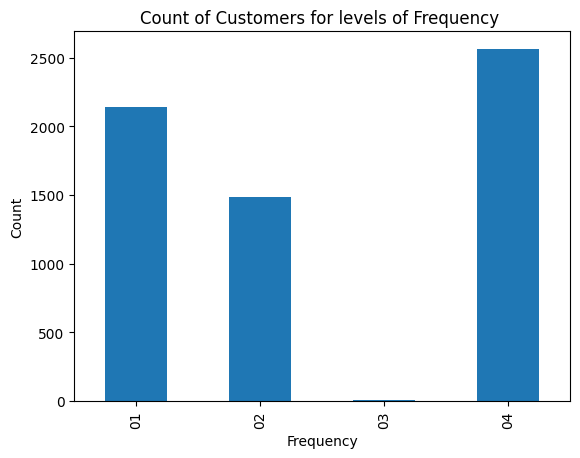

In [ ]:
# count of frequency_clean by customer_number graph with a
operating_hours.groupby('FREQUENCY_CLEAN')['CUSTOMER_NUMBER'].count()\
.plot(kind = 'bar')

plt.title('Count of Customers for levels of Frequency ')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Orders

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/orders.csv" ./

In [ ]:
orders = pd.read_csv("orders.csv")

orders.head()

,CUSTOMER_ID,CREATED_DATE_EST,CREATED_DATE_UTC,MATERIAL_ID,ORDER_QUANTITY,ORDER_TYPE,PLANT_ID
0,600265510,2025-01-10,2025-01-10T22:40:25.000Z,152965.0,1.0,CALL CENTER,G267
1,600584506,2024-11-22,2024-11-22T17:34:30.000Z,156127.0,1.0,SALES REP,G221
2,600686120,2024-06-04,2024-06-05T00:29:33.000Z,103886.0,1.0,SALES REP,G291
3,501087671,2024-12-03,2024-12-03T18:14:23.000Z,134926.0,2.0,SALES REP,G163
4,501680332,2025-03-31,2025-03-31T22:33:07.000Z,152196.0,1.0,SALES REP,G221


In [ ]:
# check for nulls
orders.isnull().sum()

,0
CUSTOMER_ID,0
CREATED_DATE_EST,0
CREATED_DATE_UTC,0
MATERIAL_ID,195
ORDER_QUANTITY,0
ORDER_TYPE,0
PLANT_ID,11


In [ ]:
# 195 missing material_ids and 11 missing plant_ids but 1.6 million rows is a lot
orders.count()

,0
CUSTOMER_ID,1662157
CREATED_DATE_EST,1662157
CREATED_DATE_UTC,1662157
MATERIAL_ID,1661962
ORDER_QUANTITY,1662157
ORDER_TYPE,1662157
PLANT_ID,1662146


In [ ]:
# Going to just remove the null rows from orders because you cannot impute IDs
orders_clean = orders.copy()
orders_clean = orders_clean.dropna()

# switch create date to datetime
orders_clean['CREATED_DATE_EST'] = pd.to_datetime(orders_clean['CREATED_DATE_EST'])
orders_clean['CREATED_DATE_UTC'] = pd.to_datetime(orders_clean['CREATED_DATE_UTC'])


In [ ]:
orders_clean.count()

,0
CUSTOMER_ID,1661962
CREATED_DATE_EST,1661962
CREATED_DATE_UTC,1661962
MATERIAL_ID,1661962
ORDER_QUANTITY,1661962
ORDER_TYPE,1661962
PLANT_ID,1661962


In [ ]:
# let's look for outliers in order_quantity
orders_clean['ORDER_QUANTITY'].describe()

# I do not see any notable outliers

,ORDER_QUANTITY
count,1.661962e+06
mean,2.810609e+00
std,1.293455e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.000000e+03


# Sales

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/sales.csv" ./

In [ ]:
sales = pd.read_csv("sales.csv")

sales.head()

,CUSTOMER_ID,POSTING_DATE,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
0,501473438,2024-06-10,123159,53.60,8.0,111.04,111.04,53.60
1,501473438,2024-06-10,115584,21.76,4.0,51.12,51.12,21.76
2,501502460,2024-06-10,103996,-0.89,2.0,210.80,210.80,-0.89
3,501168843,2024-06-10,156091,10.20,2.0,30.50,30.50,10.20
4,501583464,2024-06-10,119827,42.15,4.0,98.40,88.40,52.15


In [ ]:
# check for nulls
sales.isnull().sum()

,0
CUSTOMER_ID,0
POSTING_DATE,0
MATERIAL_ID,0
GROSS_PROFIT_DEAD_NET,0
PHYSICAL_VOLUME,0
NSI,0
NSI_DEAD_NET,0
GROSS_PROFIT,0


In [ ]:
# check for outliers
sales.describe()

,CUSTOMER_ID,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
count,4.997870e+05,499787.000000,499787.000000,499787.000000,499787.000000,499787.000000,499787.000000
mean,5.430889e+08,148828.482618,71.258057,6.779922,188.673291,179.207562,73.354875
std,4.892893e+07,75610.369930,206.914366,22.583076,580.025857,565.228753,226.102531
min,5.002457e+08,100722.000000,-5911.500000,1.042000,0.050000,-201.600000,-5699.400000
25%,5.012676e+08,116149.000000,16.750000,2.000000,53.280000,49.350000,15.750000
50%,5.016566e+08,129252.000000,32.120000,2.000000,82.650000,76.680000,30.340000
75%,6.000796e+08,151817.000000,58.660000,4.000000,153.800000,141.000000,59.980000
max,6.009753e+08,700462.000000,16797.210000,2000.000000,64064.000000,61614.000000,19068.000000


In [ ]:
# get the top 5 highest values for physical volume
sales.nlargest(5, 'PHYSICAL_VOLUME')

,CUSTOMER_ID,POSTING_DATE,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
219601,501697174,2024-12-04,151817,5400.00,2000.0,60700.0,60700.0,5000.00
55213,501697174,2025-05-05,151818,2396.35,1400.0,47110.0,47110.0,2396.35
101156,501697174,2025-01-27,151818,2396.35,1400.0,47110.0,47110.0,2396.35
229726,501697174,2025-02-10,151817,2396.35,1400.0,47110.0,47110.0,2396.35
241833,501697174,2025-04-24,151818,2396.35,1400.0,47110.0,47110.0,2396.35


In [ ]:
# 5 highest values for nsi_dead_net
sales.nlargest(5, 'NSI_DEAD_NET')

,CUSTOMER_ID,POSTING_DATE,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
275900,600265975,2024-10-25,133129,16618.00,1400.0,64064.0,61614.0,19068.00
219601,501697174,2024-12-04,151817,5400.00,2000.0,60700.0,60700.0,5000.00
55213,501697174,2025-05-05,151818,2396.35,1400.0,47110.0,47110.0,2396.35
101156,501697174,2025-01-27,151818,2396.35,1400.0,47110.0,47110.0,2396.35
229726,501697174,2025-02-10,151817,2396.35,1400.0,47110.0,47110.0,2396.35


In [ ]:
# 5 smallest values for nsi_dead_net
sales.nsmallest(5, 'NSI_DEAD_NET')

,CUSTOMER_ID,POSTING_DATE,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
264768,501625056,2024-07-25,116366,-479.14,84.0,10080.0,-201.6,9802.46
298600,501625056,2025-03-10,116366,-500.84,84.0,10080.0,-201.6,9780.76
338119,501625056,2024-10-29,116366,-479.14,84.0,10080.0,-201.6,9802.46
450445,501625056,2024-06-20,116366,-479.14,84.0,10080.0,-201.6,9802.46
206120,500933326,2024-08-07,157034,-766.34,75.0,7200.0,-180.0,6613.66


In [ ]:
#5 largest for gross profit
sales.nlargest(5, 'GROSS_PROFIT')

,CUSTOMER_ID,POSTING_DATE,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
275900,600265975,2024-10-25,133129,16618.00,1400.0,64064.00,61614.00,19068.00
400747,501101226,2024-10-29,157034,16797.21,800.0,24168.00,22568.00,18397.21
409193,501101226,2024-12-27,157298,9763.50,1150.0,34741.50,32441.50,12063.50
492031,500325463,2025-04-25,116366,-270.40,100.0,12000.00,0.00,11729.60
4156,501336609,2024-08-03,112259,10789.39,924.0,16484.16,16484.16,10789.39


In [ ]:
#5 smallest for gross profit
sales.nsmallest(5, 'GROSS_PROFIT')

,CUSTOMER_ID,POSTING_DATE,MATERIAL_ID,GROSS_PROFIT_DEAD_NET,PHYSICAL_VOLUME,NSI,NSI_DEAD_NET,GROSS_PROFIT
440099,500448571,2024-07-18,133109,-5911.5,210.0,1050.0,1050.0,-5699.4
456599,500448571,2024-07-05,133129,-3433.5,210.0,3528.0,3528.0,-3221.4
135690,500448571,2024-06-24,410606,-1830.5,70.0,350.0,350.0,-1899.8
198680,500448571,2024-07-05,410606,-1830.5,70.0,350.0,350.0,-1899.8
261191,500448571,2024-06-24,411879,-1830.5,70.0,350.0,350.0,-1899.8


Numbers that look somewhat like outliers but they are not quite off enough to remove

# Visit Plan

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/visit_plan.csv" ./

In [ ]:
visit = pd.read_csv("visit_plan.csv")

visit.head()

/tmp/ipython-input-3452411496.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv("visit_plan.csv")


,CUSTOMER_ID,FREQUENCY,ELT_TS,SNAPSHOT_DATE,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC
0,500405850,02,2021-12-14T05:49:54.551Z,2021-12-13,2020-07-20,G133,"Glenwood Springs, CO",SL,48 Hours
1,500286563,01,2021-12-14T05:49:54.551Z,2021-12-13,2019-11-04,G236,"Denver, CO",OF,48 Hours
2,600057832,01,2021-12-14T05:49:54.551Z,2021-12-13,2021-08-02,G111,"Draper, UT",SL,48 Hours
3,500431853,01,2021-12-14T05:49:54.551Z,2021-12-13,2020-04-06,G111,"Draper, UT",SL,48 Hours
4,600076074,01,2021-12-14T05:49:54.551Z,2021-12-13,2019-06-07,G142,"Pocatello, ID",EZ,24 Hours


In [ ]:
# check for nulls
visit.isnull().sum()

,0
CUSTOMER_ID,0
FREQUENCY,13961
ELT_TS,0
SNAPSHOT_DATE,0
ANCHOR_DATE,13962
SALES_OFFICE,74
SALES_OFFICE_DESC,74
DISTRIBUTION_MODE,15296
SHIPPING_CONDITIONS_DESC,74


In [ ]:
visit.count()

,0
CUSTOMER_ID,13638683
FREQUENCY,13624722
ELT_TS,13638683
SNAPSHOT_DATE,13638683
ANCHOR_DATE,13624721
SALES_OFFICE,13638609
SALES_OFFICE_DESC,13638609
DISTRIBUTION_MODE,13623387
SHIPPING_CONDITIONS_DESC,13638609


In [ ]:
# such a low % of nulls that I am just going to remove them
visit_clean = visit.copy()
visit_clean = visit_clean.dropna()

In [ ]:
visit_clean.count()

,0
CUSTOMER_ID,13609467
FREQUENCY,13609467
ELT_TS,13609467
SNAPSHOT_DATE,13609467
ANCHOR_DATE,13609467
SALES_OFFICE,13609467
SALES_OFFICE_DESC,13609467
DISTRIBUTION_MODE,13609467
SHIPPING_CONDITIONS_DESC,13609467


In [ ]:
visit_clean['FREQUENCY'].value_counts()

,count
FREQUENCY,
01,6065308
1.0,2419919
Every Week On,1456931
02,1102396
2.0,591358
4.0,499669
04,482284
Every Second Week On,429575
Every Fourth Week On,303488


In [ ]:
# frequency map
frequency_map = {
    # Weekly
    '01': '01', '1.0': '01', '1': '01', 'Every Week On': '01',

    # Every 2 weeks
    '02': '02', '2.0': '02', '2': '02', 'Every Second Week On': '02',

    # Every 3 weeks
    '03': '03', '3.0': '03', '3': '03', 'Every Third Week On': '03',

    # Every 4 weeks
    '04': '04', '4.0': '04', '4': '04', 'Every Fourth Week On': '04',

    # Every 5 weeks
    '05': '05', '5.0': '05', '5': '05', 'Every Fifth Week On': '05',

    # Every 6 weeks
    '06': '06', '6.0': '06', '6': '06', 'Every Sixth Week On': '06',

    # Every 8 weeks
    '08': '08', '8.0': '08', '8': '08', 'Every Eighth Week On': '08',

    # Every 10 weeks
    '10': '10', '10.0': '10', 'Every Tenth Week On': '10',

    # Not applicable or unknown
    'Not Applicable': 'NA'
}


In [ ]:
visit_clean['FREQUENCY_CLEAN'] = visit_clean['FREQUENCY'].map(frequency_map)

visit_clean['FREQUENCY_CLEAN'].value_counts()

,count
FREQUENCY_CLEAN,
01,7522239
02,1531971
04,785772
03,67598
10,33851
08,5688
05,3458
06,1170
NA,1105


In [ ]:
visit_clean['DISTRIBUTION_MODE'].value_counts()

,count
DISTRIBUTION_MODE,
SL,5581522
OF,5480509
RD,2259762
BK,221900
FS,37943
NS,11480
NR,5874
NO,4512
EZ,3911


Mapping for consistent formatting for distribution mode description

In [ ]:
# mapping for code to description
code_to_description = {
    'OF': 'OFS',
    'SL': 'Sideload',
    'BK': 'Bulk Distribution',
    'FS': 'Full Service',
    'RD': 'Rapid Delivery',
    'NR': 'Night Rapid Delivery',
    'NS': 'Tell Sell',
    'NO': 'Night OFS',
    'EZ': 'E Pallet',
    'SE': 'Special Events',
    'DD': 'Night Sideload'
}


In [ ]:
# creating distribution_mode_desc column
visit_clean['DISTRIBUTION_MODE_DESC'] = visit_clean['DISTRIBUTION_MODE'].map(code_to_description)

visit_clean['DISTRIBUTION_MODE_DESC'].value_counts()

,count
DISTRIBUTION_MODE_DESC,
Sideload,5581522
OFS,5480509
Rapid Delivery,2259762
Bulk Distribution,221900
Full Service,37943
Tell Sell,11480
Night Rapid Delivery,5874
Night OFS,4512
E Pallet,3911


In [ ]:
# checking sales office description for visit plan
visit_clean['SALES_OFFICE_DESC'].value_counts()

,count
SALES_OFFICE_DESC,
"Draper, UT",2656717
"Tempe, AZ",945175
"Denver, CO",808290
"Bellevue, WA",660030
"Wilsonville, OR",651146
"Tacoma, WA",629464
"Boise, ID",625165
"Reno, NV",536695
"Albuquerque, NM",508908


There are incorrect dates in anchor date for visit plan that we need to filter out

In [ ]:
visit_min = visit_clean["ANCHOR_DATE"].min()
visit_max = visit_clean["ANCHOR_DATE"].max()
print(f"visit date range: {visit_min} → {visit_max}")

# Unreasonable dates

visit date range: 1995-01-01 → 3034-09-30


In [ ]:
# check number of distinct anchor dates for cusromer id = 501738077
visit_clean[visit_clean['CUSTOMER_ID'] == 501738077]['ANCHOR_DATE'].nunique()


3

In [ ]:
visit_clean[visit_clean['CUSTOMER_ID'] == 501738077]


,CUSTOMER_ID,FREQUENCY,ELT_TS,SNAPSHOT_DATE,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC
1359254,501738077,1.0,2024-11-20T02:37:13.345Z,2024-11-19,2024-12-17,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery
1361924,501738077,1.0,2024-11-21T02:42:04.855Z,2024-11-20,2024-12-17,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery
1368474,501738077,1.0,2024-11-25T02:39:03.172Z,2024-11-24,2024-12-17,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery
1372857,501738077,1.0,2024-11-29T02:36:12.919Z,2024-11-28,2024-12-17,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery
1375230,501738077,1.0,2024-11-30T02:38:31.799Z,2024-11-29,2024-12-17,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery
...,...,...,...,...,...,...,...,...,...,...,...
12899867,501738077,01,2025-07-19T01:35:51.897Z,2025-07-18,2025-02-07,G261,"Tempe, AZ",RD,48 Hours,01,Rapid Delivery
12911794,501738077,01,2025-07-25T01:33:35.745Z,2025-07-24,2025-02-07,G261,"Tempe, AZ",RD,48 Hours,01,Rapid Delivery
12927660,501738077,01,2025-08-03T01:32:59.084Z,2025-08-02,2025-02-07,G261,"Tempe, AZ",RD,48 Hours,01,Rapid Delivery
12934506,501738077,01,2025-08-08T01:33:25.763Z,2025-08-07,2025-02-07,G261,"Tempe, AZ",RD,48 Hours,01,Rapid Delivery


# Google Analytics

In [ ]:
!cp "/content/drive/MyDrive/MSBA_Capstone/msba_data/google_analytics.csv" ./

In [ ]:
ga = pd.read_csv("google_analytics.csv")

ga.head()

,CUSTOMER_ID,EVENT_DATE,EVENT_TIMESTAMP,EVENT_NAME,DEVICE_CATEGORY,DEVICE_MOBILE_BRAND_NAME,DEVICE_OPERATING_SYSTEM,EVENT_PAGE_NAME,EVENT_PAGE_TITLE,ITEMS
0,501508595,2025-04-07,2025-04-07T14:57:40.713Z,view_search_results,mobile,Samsung,Android,Product List,NaN,[]
1,501730915,2025-04-07,2025-04-07T19:28:54.546Z,view_item_list,desktop,Google,Windows,NaN,Search,"[{""item_id"":""158520"",""quantity"":""1""},{""item_id..."
2,501567329,2025-04-07,2025-04-07T21:40:56.281Z,purchase,desktop,Google,Windows,MyCoke Orders - Purchase Success,Order,"[{""item_id"":""138335"",""quantity"":""2""},{""item_id..."
3,501765083,2025-04-08,2025-04-08T06:06:36.717Z,user_engagement,mobile,Apple,iOS,NaN,NaN,[]
4,501707837,2025-04-08,2025-04-08T18:12:10.511Z,view_item_list,desktop,Google,Windows,MyCoke Orders,Category: All Products,"[{""item_id"":""412588"",""quantity"":""1""},{""item_id..."


In [ ]:
# check for nulls
ga.isnull().sum()

,0
CUSTOMER_ID,0
EVENT_DATE,0
EVENT_TIMESTAMP,0
EVENT_NAME,0
DEVICE_CATEGORY,0
DEVICE_MOBILE_BRAND_NAME,39468
DEVICE_OPERATING_SYSTEM,0
EVENT_PAGE_NAME,1002510
EVENT_PAGE_TITLE,318091
ITEMS,0


In [ ]:
ga.count()

,0
CUSTOMER_ID,3704088
EVENT_DATE,3704088
EVENT_TIMESTAMP,3704088
EVENT_NAME,3704088
DEVICE_CATEGORY,3704088
DEVICE_MOBILE_BRAND_NAME,3664620
DEVICE_OPERATING_SYSTEM,3704088
EVENT_PAGE_NAME,2701578
EVENT_PAGE_TITLE,3385997
ITEMS,3704088


Remove the event page columns or impute?

In [ ]:
# lets see the top 10 event names by value count
ga['EVENT_NAME'].value_counts().head(50)


,count
EVENT_NAME,
page_view,1198482
button_click,681917
view_item_list,558466
update_cart,215783
add_to_cart,200580
nav_link_click,141975
view_site_search,106603
proceed_to_checkout,87869
user_engagement,58255


In [ ]:
ga['CUSTOMER_ID'].head(10)

,CUSTOMER_ID
0,501508595
1,501730915
2,501567329
3,501765083
4,501707837
5,501737588
6,501231223
7,501018015
8,501701364
9,600266414


In [ ]:
# lets compare event page name and event page title together
print(ga[['EVENT_PAGE_TITLE', 'EVENT_PAGE_NAME']].head())



         EVENT_PAGE_TITLE                   EVENT_PAGE_NAME
0                     NaN                      Product List
1                  Search                               NaN
2                   Order  MyCoke Orders - Purchase Success
3                     NaN                               NaN
4  Category: All Products                     MyCoke Orders


In [ ]:
ga_clean = ga.copy()
ga_clean["EVENT_TIMESTAMP_UTC"] = pd.to_datetime(ga_clean["EVENT_TIMESTAMP"], errors="coerce").dt.tz_localize(None)

In [ ]:
# values for device mobile brand name
ga_clean['DEVICE_MOBILE_BRAND_NAME'].value_counts()


,count
DEVICE_MOBILE_BRAND_NAME,
Google,1600687
Apple,938260
Microsoft,925093
Samsung,126443
Mozilla,54591
Motorola,7459
Opera Software,5988
T-Mobile,3154
OnePlus,1549


In [ ]:
# filling nulls with unknown
ga_clean['DEVICE_MOBILE_BRAND_NAME'] = ga_clean['DEVICE_MOBILE_BRAND_NAME'].fillna('Unknown')

In [ ]:
# removing event page columns
ga_clean = ga_clean.drop(columns=['EVENT_PAGE_TITLE', 'EVENT_PAGE_NAME'])

In [ ]:
ga_clean.head(10)

,CUSTOMER_ID,EVENT_DATE,EVENT_TIMESTAMP,EVENT_NAME,DEVICE_CATEGORY,DEVICE_MOBILE_BRAND_NAME,DEVICE_OPERATING_SYSTEM,ITEMS,EVENT_TIMESTAMP_UTC
0,501508595,2025-04-07,2025-04-07T14:57:40.713Z,view_search_results,mobile,Samsung,Android,[],2025-04-07 14:57:40.713
1,501730915,2025-04-07,2025-04-07T19:28:54.546Z,view_item_list,desktop,Google,Windows,"[{""item_id"":""158520"",""quantity"":""1""},{""item_id...",2025-04-07 19:28:54.546
2,501567329,2025-04-07,2025-04-07T21:40:56.281Z,purchase,desktop,Google,Windows,"[{""item_id"":""138335"",""quantity"":""2""},{""item_id...",2025-04-07 21:40:56.281
3,501765083,2025-04-08,2025-04-08T06:06:36.717Z,user_engagement,mobile,Apple,iOS,[],2025-04-08 06:06:36.717
4,501707837,2025-04-08,2025-04-08T18:12:10.511Z,view_item_list,desktop,Google,Windows,"[{""item_id"":""412588"",""quantity"":""1""},{""item_id...",2025-04-08 18:12:10.511
5,501737588,2025-04-07,2025-04-07T21:34:04.078Z,ProductsList_PLP_Retrieved,mobile,Apple,iOS,[],2025-04-07 21:34:04.078
6,501231223,2025-04-05,2025-04-05T15:42:12.999Z,page_view,desktop,Google,Windows,[],2025-04-05 15:42:12.999
7,501018015,2025-04-09,2025-04-09T22:29:38.413Z,page_view,desktop,Google,Windows,[],2025-04-09 22:29:38.413
8,501701364,2025-04-09,2025-04-09T22:21:16.769Z,pay_invoice_click,mobile,Apple,iOS,[],2025-04-09 22:21:16.769
9,600266414,2025-04-06,2025-04-06T16:38:53.854Z,page_view,desktop,Microsoft,Windows,[],2025-04-06 16:38:53.854


# Joining and Creating Order Window


In [ ]:
type(visit_clean['ANCHOR_DATE'][0])

# Turn ANCHOR_DATE into date dtype
visit_clean['ANCHOR_DATE'] = pd.to_datetime(visit_clean['ANCHOR_DATE'], errors='coerce')

# Add a day of the week column
visit_clean['WEEK_DAY_OF_ANCHOR_DATE'] = visit_clean['ANCHOR_DATE'].dt.day_name()

# FREQUENCY column, standardize values
clean = visit_clean['FREQUENCY'].astype(str).str.strip()

mapped = clean.replace({
    "01": 1, "1": 1, "1.0": 1, "1 ": 1, " 1": 1, "Every Week On": 1,
    "02": 2, "2": 2, "2.0": 2, "2 ": 2, "Every Second Week On": 2,
    "03": 3, "3": 3, "3.0": 3, "3 ": 3, "Every Third Week On": 3,
    "04": 4, "4": 4, "4.0": 4, "4 ": 4, "Every Fourth Week On": 4,
    "05": 5, "5": 5, "5.0": 5, "5 ": 5, "Every Fifth Week On": 5,
    "06": 6, "6": 6, "6.0": 6, "Every Sixth Week On": 6,
    "08": 8, "8": 8, "8.0": 8, "Every Eighth Week On": 8,
    "10": 10, "10.0": 10, "Every Tenth Week On": 10,
    "Not Applicable": None
})

# Make it into days (week*7)
visit_clean['WINDOW_FREQUENCY'] = (pd.to_numeric(mapped, errors='coerce').astype('Int64')*7)

/tmp/ipython-input-205099486.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mapped = clean.replace({


In [ ]:
# Mapping for shipping time
mapping_hours = {
    "24hrs": "24 Hours",
    "72hrs": "72 Hours",
    "48hrs": "48 Hours"
}

cutoff_times_clean["SHIPPING_CONDITION_TIME"] = cutoff_times_clean["SHIPPING_CONDITION_TIME"].map(mapping_hours)

/tmp/ipython-input-2684114028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutoff_times_clean["SHIPPING_CONDITION_TIME"] = cutoff_times_clean["SHIPPING_CONDITION_TIME"].map(mapping_hours)


In [ ]:
# joining visit and cutoff
master = pd.merge(visit_clean, cutoff_times_clean, left_on=["SALES_OFFICE","SHIPPING_CONDITIONS_DESC","DISTRIBUTION_MODE_DESC"],
                  right_on=["PLANT_ID","SHIPPING_CONDITION_TIME","DISTRIBUTION_MODE_DESC"],how="left")

In [ ]:
master.head(10)

,CUSTOMER_ID,FREQUENCY,ELT_TS,SNAPSHOT_DATE,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC,WEEK_DAY_OF_ANCHOR_DATE,WINDOW_FREQUENCY,SALES_OFFICE_DESCRIPTION,PLANT_ID,CUTOFFTIME__C,SHIPPING_CONDITION_TIME
0,500405850,02,2021-12-14T05:49:54.551Z,2021-12-13,2020-07-20,G133,"Glenwood Springs, CO",SL,48 Hours,02,Sideload,Monday,14,"Glenwood, CO",G133,4:00:00 PM,48 Hours
1,500286563,01,2021-12-14T05:49:54.551Z,2021-12-13,2019-11-04,G236,"Denver, CO",OF,48 Hours,01,OFS,Monday,7,"Denver, CO",G236,4:00:00 PM,48 Hours
2,600057832,01,2021-12-14T05:49:54.551Z,2021-12-13,2021-08-02,G111,"Draper, UT",SL,48 Hours,01,Sideload,Monday,7,NaN,NaN,NaN,NaN
3,500431853,01,2021-12-14T05:49:54.551Z,2021-12-13,2020-04-06,G111,"Draper, UT",SL,48 Hours,01,Sideload,Monday,7,NaN,NaN,NaN,NaN
4,600076074,01,2021-12-14T05:49:54.551Z,2021-12-13,2019-06-07,G142,"Pocatello, ID",EZ,24 Hours,01,E Pallet,Friday,7,"Pocatello, ID",G142,2:00:00 PM,24 Hours
5,600057023,02,2021-12-14T05:49:54.551Z,2021-12-13,2020-04-13,G111,"Draper, UT",SL,48 Hours,02,Sideload,Monday,14,NaN,NaN,NaN,NaN
6,500985266,01,2021-12-14T05:49:54.551Z,2021-12-13,2020-04-06,G111,"Draper, UT",SL,48 Hours,01,Sideload,Monday,7,NaN,NaN,NaN,NaN
7,501109872,01,2021-12-14T05:49:54.551Z,2021-12-13,2020-08-04,G111,"Draper, UT",SL,48 Hours,01,Sideload,Tuesday,7,NaN,NaN,NaN,NaN
8,501095931,01,2021-12-14T05:49:54.551Z,2021-12-13,2021-08-02,G111,"Draper, UT",SL,48 Hours,01,Sideload,Monday,7,NaN,NaN,NaN,NaN
9,501261776,01,2021-12-14T05:49:54.551Z,2021-12-13,2021-09-21,G261,"Tempe, AZ",RD,48 Hours,01,Rapid Delivery,Tuesday,7,"Tempe, AZ",G261,4:30:00 PM,48 Hours


In [ ]:
# UNIQUE ANCHOR_DATE FOR 1 SINGLE CUSTOMER
master = master.drop_duplicates(subset=['CUSTOMER_ID', 'ANCHOR_DATE']).sort_values('ANCHOR_DATE')

In [ ]:
# Filter for what we the dates we need (from GA table min and max dates)
master = master[(master['ANCHOR_DATE'] > pd.to_datetime('2024-06-05')) &
       (master['ANCHOR_DATE'] < pd.to_datetime('2025-05-26'))].copy()

In [ ]:
master["CUTOFFTIME__C"] = master["CUTOFFTIME__C"].fillna("5:00:00 PM")
master = master.drop(columns=["FREQUENCY", "ELT_TS","SNAPSHOT_DATE","SALES_OFFICE_DESCRIPTION",
                              "SHIPPING_CONDITION_TIME","PLANT_ID" ])

In [ ]:
# Master table included data out of our needed range
master['ANCHOR_DATE'] = pd.to_datetime(master['ANCHOR_DATE'])
master_correct_date = master[(master['ANCHOR_DATE'] > pd.to_datetime('2024-06-05')) &
       (master['ANCHOR_DATE'] < pd.to_datetime('2025-05-26'))].copy()

len(master_correct_date)

10920

In [ ]:
# Fill in between the unique ANCHOR_DATE with WINDOW_FREQUENCY

master_test = master.copy()

master_test["ANCHOR_DATE"] = pd.to_datetime(master_test["ANCHOR_DATE"])
master_test["WINDOW_FREQUENCY"] = pd.to_numeric(master_test["WINDOW_FREQUENCY"], errors="coerce").astype("Int64")

wd_map = {'monday':0,'tuesday':1,'wednesday':2,'thursday':3,'friday':4,'saturday':5,'sunday':6}
master_test["__wd"] = master_test["WEEK_DAY_OF_ANCHOR_DATE"].str.lower().map(wd_map)

# end of each policy segment = next original ANCHOR_DATE (per customer), else +365d
master_test = master_test.sort_values(["CUSTOMER_ID","ANCHOR_DATE"]).reset_index(drop=True)
master_test["__seg_end"] = master_test.groupby("CUSTOMER_ID")["ANCHOR_DATE"].shift(-1)
master_test["__seg_end"] = master_test["__seg_end"].fillna(master_test["ANCHOR_DATE"] + pd.Timedelta(days=365))

# first aligned NEXT for each original row
cand = master_test["ANCHOR_DATE"] + pd.to_timedelta(master_test["WINDOW_FREQUENCY"].fillna(0), unit="D")
off  = (master_test["__wd"] - cand.dt.weekday) % 7
first_next = cand + pd.to_timedelta(off, unit="D")

# build ranges (use int(step) only when notna)
ranges = [
    pd.date_range(start=fn, end=se - pd.Timedelta(days=1), freq=f"{int(step)}D")
    if (pd.notna(fn) and pd.notna(step) and fn < se) else pd.DatetimeIndex([])
    for fn, se, step in zip(first_next, master_test["__seg_end"], master_test["WINDOW_FREQUENCY"])
]

# explode
out = master_test.loc[master_test.index.repeat([len(r) for r in ranges])].copy()
out["ANCHOR_DATE"] = pd.DatetimeIndex([d for r in ranges for d in r])

# compute the next aligned date for each expanded row
next_cand = out["ANCHOR_DATE"] + pd.to_timedelta(out["WINDOW_FREQUENCY"], unit="D")
next_off  = (out["__wd"] - next_cand.dt.weekday) % 7
out["NEXT_ANCHOR_SAME_WD"] = next_cand + pd.to_timedelta(next_off, unit="D")

# include original rows with their NEXT
orig = master_test.copy()
orig["NEXT_ANCHOR_SAME_WD"] = first_next

final = (
    pd.concat([orig, out], ignore_index=True)
      .drop(columns=["__wd","__seg_end"])
      .sort_values(["CUSTOMER_ID","ANCHOR_DATE"])
      .reset_index(drop=True)
)

In [ ]:
final.head(10)

,CUSTOMER_ID,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC,WEEK_DAY_OF_ANCHOR_DATE,WINDOW_FREQUENCY,CUTOFFTIME__C,NEXT_ANCHOR_SAME_WD
0,500245685,2024-11-18,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-11-25
1,500245685,2024-11-25,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-02
2,500245685,2024-12-02,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-09
3,500245685,2024-12-09,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-16
4,500245685,2024-12-16,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-23
5,500245685,2024-12-23,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-30
6,500245685,2024-12-30,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2025-01-06
7,500245685,2025-01-06,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2025-01-13
8,500245685,2025-01-13,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2025-01-20
9,500245685,2025-01-20,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2025-01-27


In [ ]:
# Same customer but now each rows are windows of order
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(final[final['CUSTOMER_ID']==501738077])

,CUSTOMER_ID,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC,WEEK_DAY_OF_ANCHOR_DATE,WINDOW_FREQUENCY,CUTOFFTIME__C,NEXT_ANCHOR_SAME_WD
164066,501738077,2024-10-23,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-10-30
164067,501738077,2024-10-30,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-11-06
164068,501738077,2024-11-06,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-11-13
164069,501738077,2024-11-13,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-11-20
164070,501738077,2024-11-20,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-11-27
164071,501738077,2024-11-27,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-12-04
164072,501738077,2024-12-04,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-12-11
164073,501738077,2024-12-11,G261,"Tempe, AZ",SL,48 Hours,NaN,Sideload,Wednesday,7,4:30:00 PM,2024-12-18
164074,501738077,2024-12-17,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery,Tuesday,7,4:30:00 PM,2024-12-24
164075,501738077,2024-12-24,G261,"Tempe, AZ",RD,48 Hours,NaN,Rapid Delivery,Tuesday,7,4:30:00 PM,2024-12-31


# Joining final table to orders data

In [ ]:

chunk_size = 1000
results = []

# Sort orders once for efficient tail(1)
orders_clean = orders_clean.sort_values(['CUSTOMER_ID', 'CREATED_DATE_EST'])

for start in range(0, len(final), chunk_size):
    end = start + chunk_size
    final_chunk = final.iloc[start:end]

    # Filter orders to only customers in this chunk
    cust_ids = final_chunk['CUSTOMER_ID'].unique()
    orders_subset = orders_clean[orders_clean['CUSTOMER_ID'].isin(cust_ids)]

    # Merge and filter by anchor window
    merged = pd.merge(final_chunk, orders_subset, on='CUSTOMER_ID', suffixes=('_final', '_order'))
    merged = merged[
        (merged['CREATED_DATE_EST'] >= merged['ANCHOR_DATE']) &
        (merged['CREATED_DATE_EST'] < merged['NEXT_ANCHOR_SAME_WD'])
    ]

    # Get most recent order per anchor window
    merged = merged.sort_values(['CUSTOMER_ID', 'ANCHOR_DATE', 'CREATED_DATE_EST'])
    recent = merged.groupby(['CUSTOMER_ID', 'ANCHOR_DATE'], as_index=False).tail(1)

    results.append(recent)

# Combine all chunks
recent_orders = pd.concat(results, ignore_index=True)

# Merge back to final
order_cols = ['CREATED_DATE_UTC', 'MATERIAL_ID', 'ORDER_QUANTITY', 'ORDER_TYPE', 'CREATED_DATE_EST']
final_with_orders = pd.merge(
    final,
    recent_orders[['CUSTOMER_ID', 'ANCHOR_DATE'] + order_cols],
    on=['CUSTOMER_ID', 'ANCHOR_DATE'],
    how='left'
)

final_with_orders['ORDER_EXISTS'] = final_with_orders['CREATED_DATE_EST'].notnull().astype(int)










In [ ]:
final_with_orders.head()

,CUSTOMER_ID,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC,WEEK_DAY_OF_ANCHOR_DATE,WINDOW_FREQUENCY,CUTOFFTIME__C,NEXT_ANCHOR_SAME_WD,CREATED_DATE_UTC,MATERIAL_ID,ORDER_QUANTITY,ORDER_TYPE,CREATED_DATE_EST,ORDER_EXISTS
0,500245685,2024-11-18,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-11-25,NaT,NaN,NaN,NaN,NaT,0
1,500245685,2024-11-25,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-02,NaT,NaN,NaN,NaN,NaT,0
2,500245685,2024-12-02,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-09,NaT,NaN,NaN,NaN,NaT,0
3,500245685,2024-12-09,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-16,NaT,NaN,NaN,NaN,NaT,0
4,500245685,2024-12-16,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,5:00:00 PM,2024-12-23,NaT,NaN,NaN,NaN,NaT,0


# Fixing timezones in GA data

In [ ]:
from datetime import timedelta

# Extract state from SALES_OFFICE_DESC, assumed format "City, ST"
final['SALES_OFFICE_STATE'] = final['SALES_OFFICE_DESC'].str.split(',').str[1].str.strip()

# Function for rough timezone offset (EST to local) by state
def est_to_local(event_time, state):
    # Define offsets in hours for each state
    offsets = {
        'AZ': -2,  # MST no DST from EST
        'WA': -3, 'OR': -3, 'CA': -3,  # PDT from EST
        'CO': -2, 'NM': -2,  # MDT from EST
        'ID': -3,  # Approximate as PDT
        'NV': -3,  # PDT
        'UT': -2,  # MDT
        'NE': -2, 'WY': -2,  # MDT approximation
        # Add other states if necessary
    }
    offset_hours = offsets.get(state, -3)  # Default -3 hours
    return event_time + timedelta(hours=offset_hours)


# Create a mapping from CUSTOMER_ID to SALES_OFFICE_STATE
customer_state_map = final[['CUSTOMER_ID', 'SALES_OFFICE_STATE']].drop_duplicates().set_index('CUSTOMER_ID')['SALES_OFFICE_STATE']

# Map SALES_OFFICE_STATE into your GA dataframe
ga_clean['SALES_OFFICE_STATE'] = ga_clean['CUSTOMER_ID'].map(customer_state_map)

ga_clean['EVENT_TIMESTAMP'] = pd.to_datetime(ga_clean['EVENT_TIMESTAMP'])
ga_clean['EVENT_TIMESTAMP_LOCAL'] = ga_clean.apply(
    lambda row: est_to_local(row['EVENT_TIMESTAMP'], row['SALES_OFFICE_STATE']), axis=1
)




# Joining with GA data

In [ ]:
chunk_size = 1000
ga_chunks = []

# Sort GA events for consistency
ga_events = ga_clean.sort_values(['CUSTOMER_ID', 'EVENT_DATE'])

for start in range(0, len(final), chunk_size):
    end = start + chunk_size
    final_chunk = final.iloc[start:end]

    # Filter GA events to only customers in this chunk
    cust_ids = final_chunk['CUSTOMER_ID'].unique()
    ga_subset = ga_events[ga_events['CUSTOMER_ID'].isin(cust_ids)]

    # Merge and filter by anchor window
    merged = pd.merge(final_chunk, ga_subset, on='CUSTOMER_ID', suffixes=('_final', '_event'))
    merged = merged[
        (merged['EVENT_DATE'] >= merged['ANCHOR_DATE']) &
        (merged['EVENT_DATE'] < merged['NEXT_ANCHOR_SAME_WD'])
    ]

    ga_chunks.append(merged)

# Combine all matching events
events_in_window = pd.concat(ga_chunks, ignore_index=True)



In [ ]:
events_in_window.head()

,CUSTOMER_ID,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC,WEEK_DAY_OF_ANCHOR_DATE,WINDOW_FREQUENCY,...,EVENT_DATE,EVENT_TIMESTAMP,EVENT_NAME,DEVICE_CATEGORY,DEVICE_MOBILE_BRAND_NAME,DEVICE_OPERATING_SYSTEM,ITEMS,EVENT_TIMESTAMP_UTC,SALES_OFFICE_STATE_event,EVENT_TIMESTAMP_LOCAL
0,500245685,2024-12-23,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,2024-12-27,2024-12-27 05:58:54.992000+00:00,page_view,desktop,Google,Windows,[],2024-12-27 05:58:54.992,UT,2024-12-27 03:58:54.992000+00:00
1,500245685,2024-12-23,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,2024-12-27,2024-12-27 06:12:10.594000+00:00,page_view,desktop,Google,Windows,[],2024-12-27 06:12:10.594,UT,2024-12-27 04:12:10.594000+00:00
2,500245685,2024-12-23,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,2024-12-27,2024-12-27 05:56:48.415000+00:00,button_click,desktop,Google,Windows,[],2024-12-27 05:56:48.415,UT,2024-12-27 03:56:48.415000+00:00
3,500245685,2024-12-23,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,2024-12-27,2024-12-27 06:01:45.727000+00:00,button_click,desktop,Google,Windows,[],2024-12-27 06:01:45.727,UT,2024-12-27 04:01:45.727000+00:00
4,500245685,2024-12-23,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,2024-12-27,2024-12-27 06:03:43.147000+00:00,page_view,desktop,Google,Windows,[],2024-12-27 06:03:43.147,UT,2024-12-27 04:03:43.147000+00:00


# Defining an Abandoned Cart and creating our final table

In [ ]:
# Step 1: Aggregate GA data at cart level
cart_level_df = (
    events_in_window
    .assign(in_window=lambda df:
        (df["EVENT_DATE"] >= df["ANCHOR_DATE"]) &
        (df["EVENT_DATE"] < df["NEXT_ANCHOR_SAME_WD"]))
    .query("in_window")
    .groupby(["CUSTOMER_ID", "ANCHOR_DATE", "NEXT_ANCHOR_SAME_WD"], as_index=False)
    .agg(
        added_items=("EVENT_NAME", lambda x: (x == "add_to_cart").sum()),
        num_items_added=("ITEMS", lambda x: sum(
            len(items) for items in x[x.index[x.index.map(lambda i: events_in_window.loc[i, "EVENT_NAME"] == "add_to_cart")]]
        )),
        purchases=("EVENT_NAME", lambda x: (x == "purchase").sum()),
        button_clicks=("EVENT_NAME", lambda x: (x == "button_click").sum()),
        total_events=("EVENT_NAME", "count")
    )
    .assign(
        ABANDONED_CART=lambda df: ((df["added_items"] > 0) & (df["purchases"] == 0)).astype(int)
    )
)





In [ ]:
cart_level_df.head()

,CUSTOMER_ID,ANCHOR_DATE,NEXT_ANCHOR_SAME_WD,added_items,num_items_added,purchases,button_clicks,total_events,ABANDONED_CART
0,500245685,2024-12-23,2024-12-30,0,0,0,81,130,0
1,500245685,2024-12-30,2025-01-06,0,0,0,3,25,0
2,500245685,2025-01-06,2025-01-13,0,0,0,3,19,0
3,500245685,2025-01-13,2025-01-20,0,0,0,10,25,0
4,500245685,2025-01-27,2025-02-03,0,0,0,9,33,0


In [ ]:
# Step 2: Filter to carts with added items
cart_level_df = cart_level_df.query("added_items > 0").copy()

In [ ]:
# abandoned cart rate
cart_level_df['ABANDONED_CART'].mean()

np.float64(0.15154935358095628)

Our abandoned Cart Rate is about 15.15%!

In [ ]:
# Step 3: Join back to final orders table
final_with_ga = final_with_orders.merge(
    cart_level_df,
    on=["CUSTOMER_ID", "ANCHOR_DATE", "NEXT_ANCHOR_SAME_WD"],
    how="inner"  # only keep rows where GA data exists
)

In [ ]:
final_with_ga.head()

,CUSTOMER_ID,ANCHOR_DATE,SALES_OFFICE,SALES_OFFICE_DESC,DISTRIBUTION_MODE,SHIPPING_CONDITIONS_DESC,FREQUENCY_CLEAN,DISTRIBUTION_MODE_DESC,WEEK_DAY_OF_ANCHOR_DATE,WINDOW_FREQUENCY,...,ORDER_QUANTITY,ORDER_TYPE,CREATED_DATE_EST,ORDER_EXISTS,added_items,num_items_added,purchases,button_clicks,total_events,ABANDONED_CART
0,500245685,2025-02-17,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,NaN,NaN,NaT,0,1,37,1,41,261,0
1,500245685,2025-03-17,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,NaN,NaN,NaT,0,1,37,1,11,44,0
2,500245685,2025-04-14,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,NaN,NaN,NaT,0,1,37,1,7,55,0
3,500245685,2025-04-28,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Monday,7,...,NaN,NaN,NaT,0,1,37,1,4,38,0
4,500245738,2024-11-20,G111,"Draper, UT",OF,48 Hours,NaN,OFS,Wednesday,7,...,1.0,MYCOKE360,2024-11-22,1,1,397,1,1,27,0


In [ ]:
# export the final_orders_ga
final_with_ga.to_csv('final_with_ga.csv', index=False)

In [3]:
!cp "/content/drive/MyDrive/Colab Notebooks/Finlay_Capstone_EDA.ipynb" ./

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Finlay_Capstone_EDA.ipynb': No such file or directory
